# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [11]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [ ]:
import requests
from citipy import citipy

# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather'

# Define your API key
api_key = '6ab3291287578e743fff9471730fd2a1'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    city_url = f"{url}?q={city.replace(' ', '+')}&appid={api_key}"

    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Perform API request
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out required data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | namdrik
Processing Record 2 of Set 1 | georgetown
Processing Record 3 of Set 1 | longyearbyen
Processing Record 4 of Set 1 | aasiaat
Processing Record 5 of Set 1 | bridlington
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | jamaame
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | mudanjiang
Processing Record 11 of Set 1 | avarua
Processing Record 12 of Set 1 | chernyshevskiy
Processing Record 13 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 14 of Set 1 | bethel


In [17]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [18]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,namdrik,5.5994,168.1028,301.45,74,86,4.37,MH,1691698747
1,georgetown,5.4112,100.3354,299.11,92,20,1.03,MY,1691698748
2,longyearbyen,78.2186,15.6401,283.06,81,100,1.54,SJ,1691698748
3,aasiaat,68.7098,-52.8699,276.32,89,100,5.02,GL,1691698749
4,bridlington,54.0831,-0.1919,293.11,89,27,0.89,GB,1691698729


In [35]:
import os

# Ensure the 'output_data' directory exists
output_directory = "output_data"
os.makedirs(output_directory, exist_ok=True)

# Export the City_Data into a CSV
output_csv_path = os.path.join(output_directory, "cities.csv")
city_data_df.to_csv(output_csv_path, index_label="City_ID")

print(f"CSV file saved at: {output_csv_path}")

CSV file saved at: output_data/cities.csv


In [36]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [37]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,namdrik,5.5994,168.1028,301.45,74,86,4.37,MH,1691698747
1,georgetown,5.4112,100.3354,299.11,92,20,1.03,MY,1691698748
2,longyearbyen,78.2186,15.6401,283.06,81,100,1.54,SJ,1691698748
3,aasiaat,68.7098,-52.8699,276.32,89,100,5.02,GL,1691698749
4,bridlington,54.0831,-0.1919,293.11,89,27,0.89,GB,1691698729


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

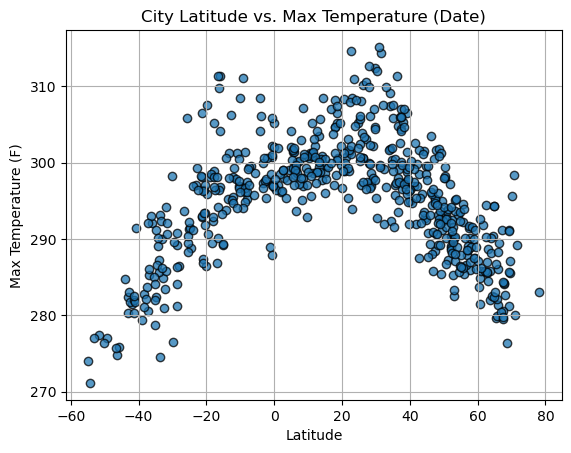

In [38]:
import matplotlib.pyplot as plt

# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (Date)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

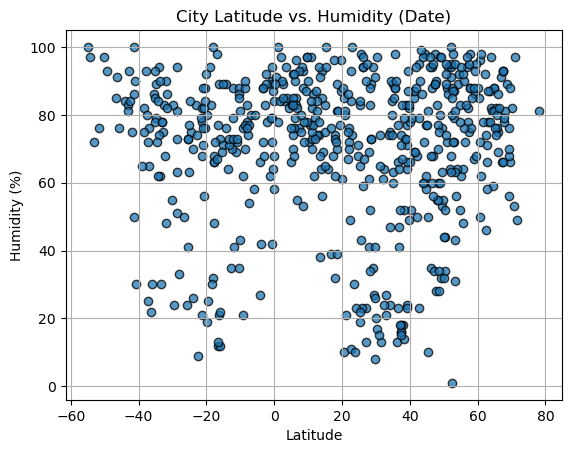

In [39]:
import matplotlib.pyplot as plt

# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (Date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

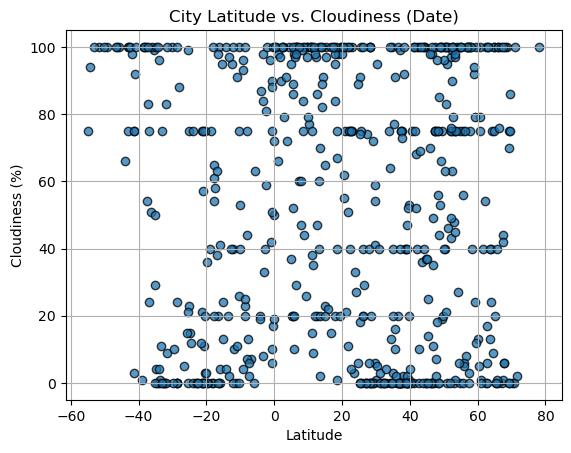

In [40]:
import matplotlib.pyplot as plt

# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (Date)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

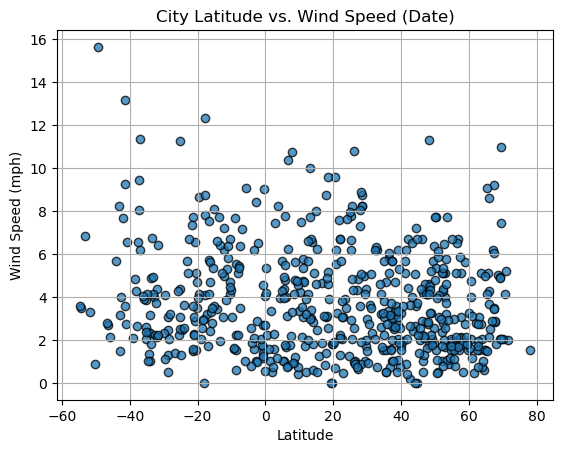

In [41]:
import matplotlib.pyplot as plt

# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (Date)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [43]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

def plot_linear_regression(x_values, y_values, title, x_label, y_label, coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    
    # Create scatter plot
    plt.scatter(x_values, y_values, edgecolor="black", alpha=0.75)
    
    # Plot the linear regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the linear regression equation
    plt.annotate(line_eq, coordinates, fontsize=15, color="red")
    
    # Incorporate graph properties
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    
    # Show plot
    plt.show()



In [45]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,namdrik,5.5994,168.1028,301.45,74,86,4.37,MH,1691698747
1,georgetown,5.4112,100.3354,299.11,92,20,1.03,MY,1691698748
2,longyearbyen,78.2186,15.6401,283.06,81,100,1.54,SJ,1691698748
3,aasiaat,68.7098,-52.8699,276.32,89,100,5.02,GL,1691698749
4,bridlington,54.0831,-0.1919,293.11,89,27,0.89,GB,1691698729


In [46]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,grytviken,-54.2811,-36.5092,271.13,97,94,3.50,GS,1691698750
7,port-aux-francais,-49.3500,70.2167,277.02,93,100,15.65,TF,1691698751
8,waitangi,-43.9535,-176.5597,284.72,84,66,5.70,NZ,1691698827
10,avarua,-21.2078,-159.7750,298.18,78,75,7.72,CK,1691698828
13,ancud,-41.8697,-73.8203,281.49,75,98,7.70,CL,1691698609


###  Temperature vs. Latitude Linear Regression Plot

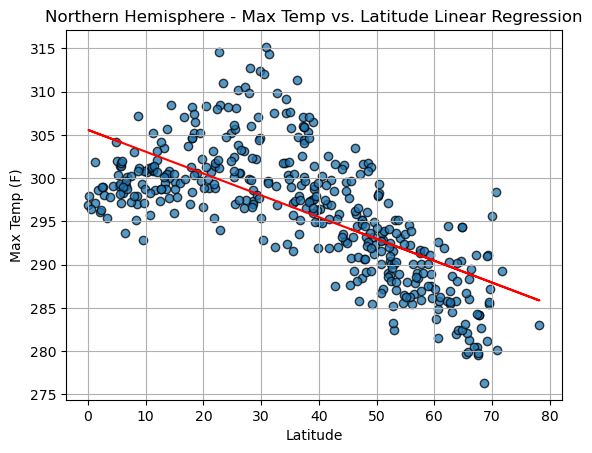

In [48]:
# Linear regression on Northern Hemisphere

# Temperature vs. Latitude
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 
                       "Northern Hemisphere - Max Temp vs. Latitude Linear Regression",
                       "Latitude", "Max Temp (F)", (0, 20))



The r-value is: 0.7161472181434118


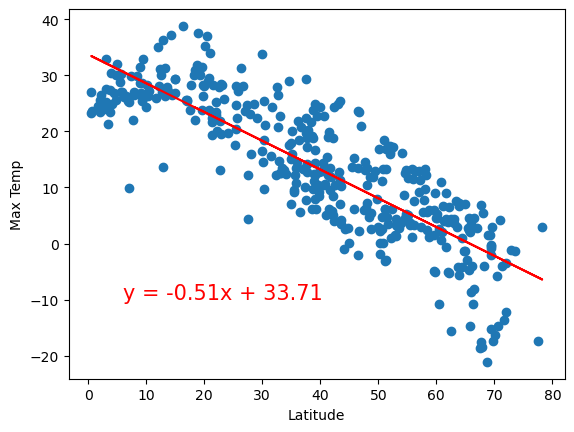

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

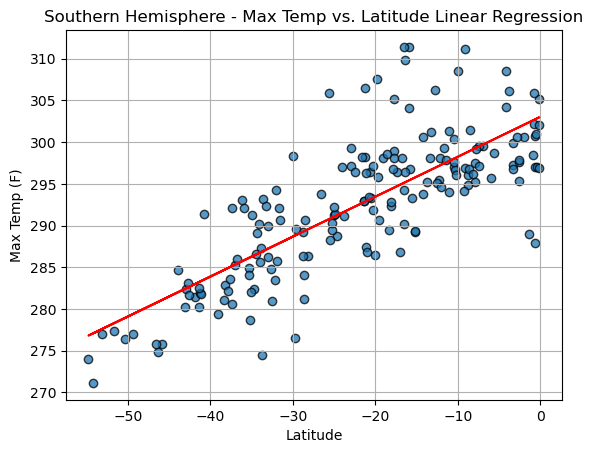

In [49]:
# Temperature vs. Latitude
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 
                       "Southern Hemisphere - Max Temp vs. Latitude Linear Regression",
                       "Latitude", "Max Temp (F)", (-50, 90))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

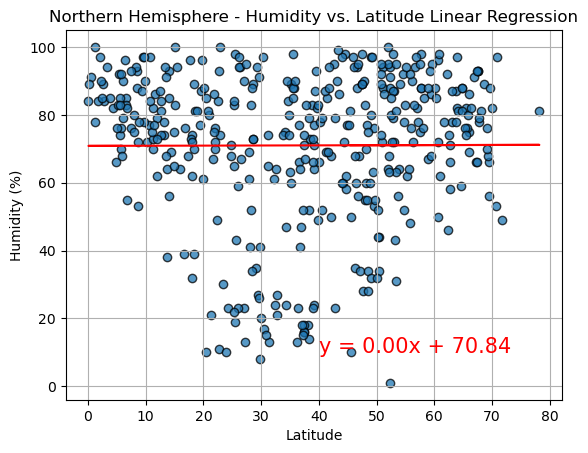

In [50]:
# Humidity vs. Latitude
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 
                       "Northern Hemisphere - Humidity vs. Latitude Linear Regression",
                       "Latitude", "Humidity (%)", (40, 10))

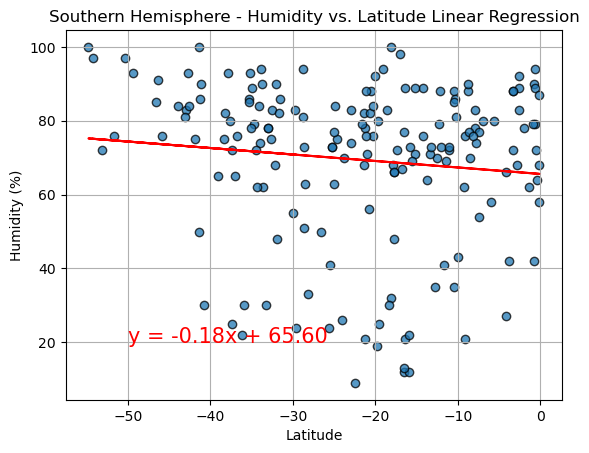

In [51]:

# Humidity vs. Latitude
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 
                       "Southern Hemisphere - Humidity vs. Latitude Linear Regression",
                       "Latitude", "Humidity (%)", (-50, 20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

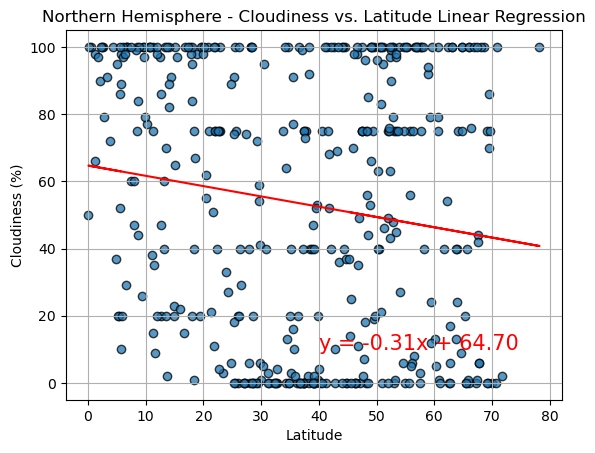

In [52]:
# Cloudiness vs. Latitude
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 
                       "Northern Hemisphere - Cloudiness vs. Latitude Linear Regression",
                       "Latitude", "Cloudiness (%)", (40, 10))

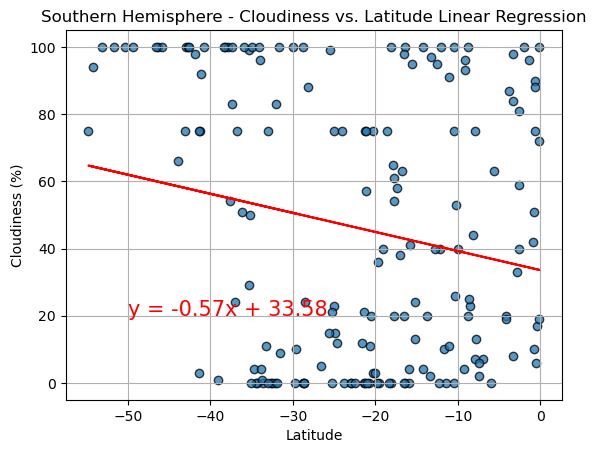

In [53]:
# Cloudiness vs. Latitude
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 
                       "Southern Hemisphere - Cloudiness vs. Latitude Linear Regression",
                       "Latitude", "Cloudiness (%)", (-50, 20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

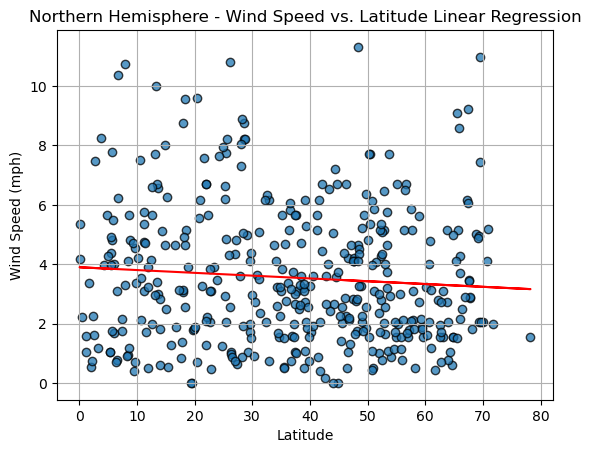

In [54]:
# Wind Speed vs. Latitude
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 
                       "Northern Hemisphere - Wind Speed vs. Latitude Linear Regression",
                       "Latitude", "Wind Speed (mph)", (30, 25))

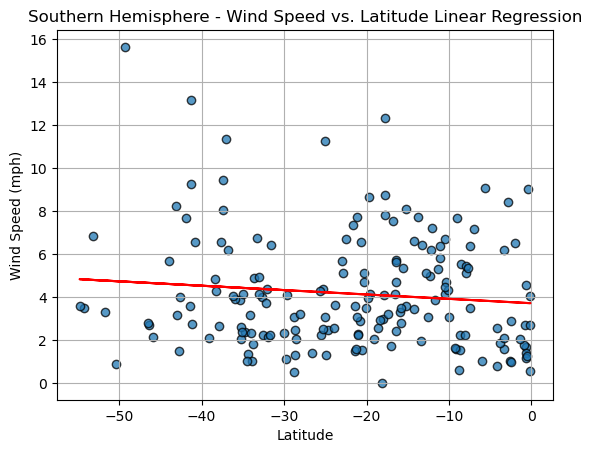

In [55]:
# Wind Speed vs. Latitude
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 
                       "Southern Hemisphere - Wind Speed vs. Latitude Linear Regression",
                       "Latitude", "Wind Speed (mph)", (-50, 25))

**Discussion about the linear relationship:** YOUR RESPONSE HERE